<a href="https://colab.research.google.com/github/kshvr16/cs666student/blob/main/CS666AssignmentOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

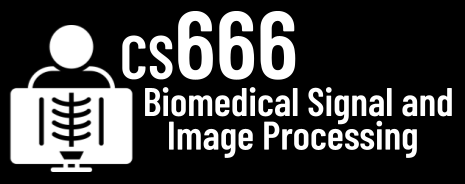

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 5.3 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [3]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

In [4]:
print(len(signal))
print(signal)

15000
[2044. 2044. 2044. ... 2044. 2045. 2043.]


In [5]:
print(metadata)

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}


**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [6]:
SAMPLING_RATE = int(metadata['sampling_rate']) ### TODO!
SECONDS = int(len(signal)/ metadata['sampling_rate']) ### TODO!

In [7]:
print(SAMPLING_RATE, SECONDS)

1000 15


**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [8]:
### TODO
from biosppy import signals
processed_signal = signals.ecg.ecg(signal, 
                                   sampling_rate=SAMPLING_RATE, show=False)

In [9]:
print(processed_signal['filtered'])

[86.59632358 89.29577068 91.89768614 ... 92.65388691 89.66260537
 86.55395748]


In [10]:
print(processed_signal['rpeaks'])

[  283  1204  2159  3188  4211  5188  6200  7232  8200  9157 10156 11198
 12159 13139 14162]


In [11]:
print(len(signal))
print(len(processed_signal['filtered']))

15000
15000


In [12]:
unfiltered_signal = signal.copy()
filtered_signal = processed_signal['filtered'].copy()

In [13]:
rpeaks = processed_signal['rpeaks'].copy()

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

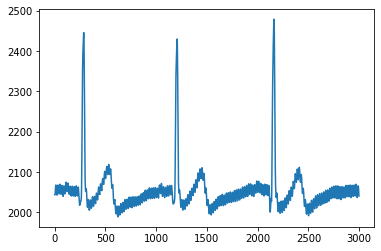

In [14]:
### TODO plot unfiltered signal
unfiltered_three_seconds = unfiltered_signal[0: 3*SAMPLING_RATE]
plt.plot(unfiltered_three_seconds)

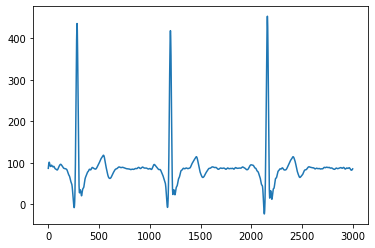

In [15]:
### TODO plot filtered signal
filtered_three_seconds = filtered_signal[0: 3*SAMPLING_RATE]
plt.plot(filtered_three_seconds)

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

Text(0.5, 0, 'time [s]')

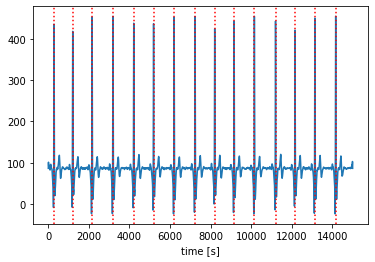

In [16]:
### TODO
plt.plot(filtered_signal)
for rpeak in rpeaks:
  plt.axvline(x=rpeak, color='r', ls=':')
plt.xlabel('time [s]')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [17]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.9 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


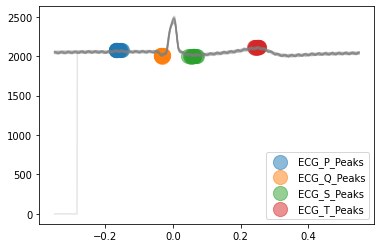

In [18]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
_, waves_peak = nk.ecg_delineate(unfiltered_signal, rpeaks, 
                                 sampling_rate=SAMPLING_RATE, method="peak",
                                 show=True, show_type='peaks')

In [ ]:
# TODO Does the detection work well?

'''
No, the detection didn't worked as required. Some P and S peaks got clubbed 
into one detection.
'''

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

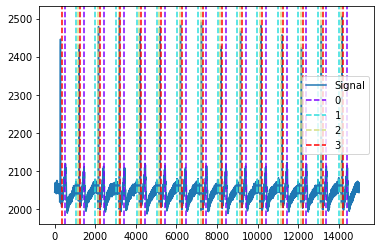

In [19]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
_, waves_peak = nk.ecg_delineate(unfiltered_signal, rpeaks, 
                                 sampling_rate=SAMPLING_RATE, method="peak")

plot = nk.events_plot([waves_peak['ECG_T_Peaks'], waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],waves_peak['ECG_S_Peaks']], 
                       unfiltered_signal)

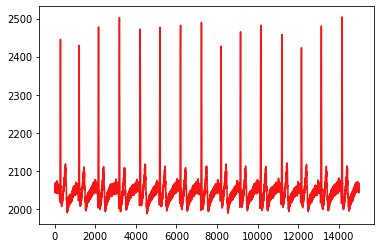

In [20]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
nk_filtered_signal = nk.signal_filter(unfiltered_signal, sampling_rate=SAMPLING_RATE, lowcut= 0, highcut=100, show=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


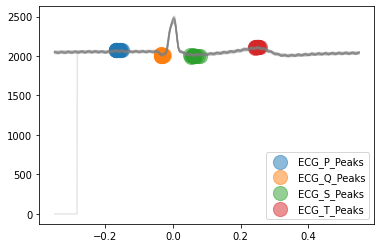

In [21]:
_, waves_peak = nk.ecg_delineate(nk_filtered_signal, rpeaks, 
                                 sampling_rate=SAMPLING_RATE, method="peak",
                                 show=True, show_type='peaks')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


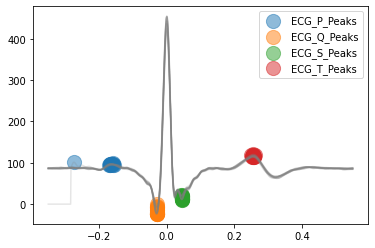

In [22]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak = nk.ecg_delineate(filtered_signal, rpeaks, 
                                 sampling_rate=SAMPLING_RATE, method="peak",
                                 show=True, show_type='peaks')

In [ ]:
# TODO Which one works the best?
'''
The P, Q, S, T peak detection worked well for the filtered signal from BioSPPY.
'''

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#